## BPM

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pandas as pd
# source the nxcals python libs
from nxcals.api.extraction.data.builders import *
from scipy.optimize import curve_fit
from datetime import datetime

In [128]:
def gaussian_function(x, a, I, mu, sig):
    return a + I / np.sqrt(2 * np.pi * sig ** 2) * np.exp(-(x - mu) ** 2 / 2. / sig ** 2)

def do_gaussian_fit(x,y):
    mu = np.average(x, weights=np.abs(y - np.min(y)))
    sigma = np.sqrt(np.average(x**2, weights=np.abs(y - np.min(y))) - mu**2)
    p0 = [y.min(), (np.max(y) - np.min(y)) * np.sqrt(2 * np.pi * sigma**2), mu, sigma]
    popt, pcov = curve_fit(gaussian_function, x, y, p0=p0, maxfev=10000) # maxfev is the number of tries it does the fit
    return popt, pcov

In [129]:
# build the query and load data into spark dataframe UTC Time from MD
start = "2022-07-27 17:40:00.000"
end = "2022-07-27 17:50:00.000"
df_bpm = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("IRRAD_BPM1/Acquisition").build().toPandas()

In [169]:
df_bpm.head(2)

__record_timestamp__  __record_version__             acqStamp      class  \
0   1658943660000000000                   0  1658943660000000000  IRRAD_BPM   
1   1658943747000000000                   0  1658943747000000000  IRRAD_BPM   

   cyclestamp      device                                          intensity  \
0           0  IRRAD_BPM1  {'elements': [0.09132495, 0.026199952, 0.05707...   
1           0  IRRAD_BPM1  {'elements': [0.090199955, 0.026074952, 0.0551...   

      property selector                                                  x  \
0  Acquisition     None  {'elements': [-4.5, -4.5, 0.0, -9.0, 0.0, -9.0...   
1  Acquisition     None  {'elements': [-4.5, -4.5, 0.0, -9.0, 0.0, -9.0...   

                                                   y  nxcals_entity_id  
0  {'elements': [-9.0, -4.5, -9.0, -9.0, -13.5, -...          51590199  
1  {'elements': [-9.0, -4.5, -9.0, -9.0, -13.5, -...          51590199

In [170]:
df_bpm.keys()

Index(['__record_timestamp__', '__record_version__', 'acqStamp', 'class',
       'cyclestamp', 'device', 'intensity', 'property', 'selector', 'x', 'y',
       'nxcals_entity_id'],
      dtype='object')

In [171]:
df_bpm.acqStamp.head(5)

0    1658943660000000000
1    1658943747000000000
2    1658943862000000000
3    1658943967000000000
4    1658944024000000000
Name: acqStamp, dtype: int64

In [172]:
Z = df_bpm.intensity[0]["elements"]
print(Z)

[0.09132495 0.02619995 0.05707495 0.07382495 0.02444995 0.32057494
 0.6636999  0.02432495 0.03657495 0.08157495 0.42432496 0.10457495
 0.02444995 0.21169995 0.17119995 0.06582495 0.02444995 0.53407496
 1.2495749  0.09882495 0.04032495 0.02444995 0.18207495 0.27794996
 0.86695    0.02832495 1.927575   0.33232495 2.000575   0.03182495
 0.06382495 0.47669995 0.02432495 0.02444995 0.23319995 0.03719995
 0.02482495 0.03582495 0.46357495]


(array([26.,  4.,  4.,  1.,  1.,  0.,  1.,  0.,  0.,  2.]),
 array([0.02432495, 0.22194996, 0.41957496, 0.61719997, 0.81482497,
        1.01244998, 1.21007498, 1.40769999, 1.60532499, 1.80295   ,
        2.000575  ]),
 <BarContainer object of 10 artists>)

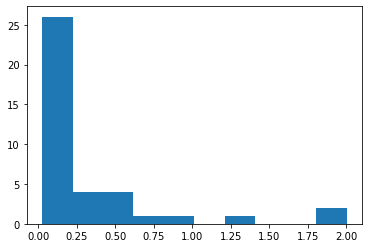

In [173]:
fig, ax = plt.subplots()
ax.hist(Z)

In [174]:
x = df_bpm.x[0]["elements"]
print(len(x))
print(x)

39
[ -4.5  -4.5   0.   -9.    0.   -9.    0.  -13.5   4.5 -13.5   4.5  18.
   9.   13.5   9.   13.5  13.5   9.    4.5  13.5 -18.   13.5 -13.5   9.
  -9.    9.   -4.5   4.5   0.    4.5 -13.5   0.  -13.5   0.   -9.    0.
  -9.   -4.5  -4.5]


In [175]:
y = df_bpm.y[0]["elements"]
print(len(y))
print(y)

39
[ -9.   -4.5  -9.   -9.  -13.5  -4.5  -4.5  -9.   -9.   -4.5  -4.5   0.
  -9.    0.   -4.5  -4.5  -9.    0.    0.    4.5   0.    9.    0.    4.5
   0.    9.    0.    4.5   0.    9.    4.5   4.5   9.   13.5   4.5   9.
   9.    9.    4.5]


Text(0, 0.5, 'mm')

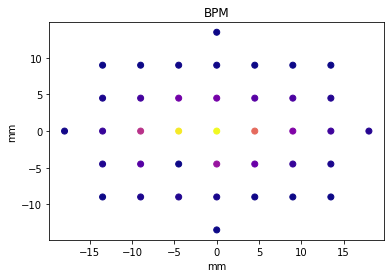

In [176]:
fig, ax = plt.subplots()

x = df_bpm.x[0]["elements"]
y = df_bpm.y[0]["elements"]
z = df_bpm.intensity[0]["elements"]

ax.scatter(x,y, c=z/z.max(), cmap="plasma")
ax.set_title("BPM")
ax.set_xlabel("mm")

ax.set_ylabel("mm")

Text(0, 0.5, 'mm')

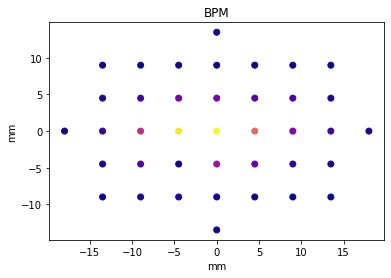

In [177]:
fig, ax = plt.subplots()

x = df_bpm.x[1]["elements"]
y = df_bpm.y[1]["elements"]
z = df_bpm.intensity[1]["elements"]

ax.scatter(x,y, c=z/z.max(), cmap="plasma")
ax.set_title("BPM")
ax.set_xlabel("mm")

ax.set_ylabel("mm")

In [178]:
d = {'x': x, 'y': y, 'intensity': z}
df = pd.DataFrame(data=d)

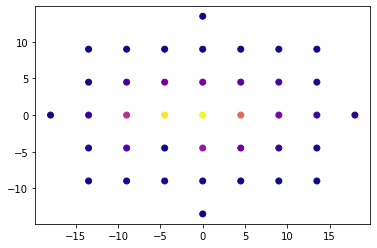

In [135]:
fig, ax = plt.subplots()
ax.scatter(df.x, df.y, c=df.intensity, cmap="plasma")

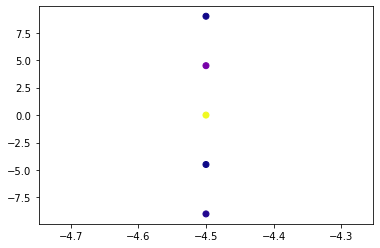

In [136]:
fig, ax = plt.subplots()
ax.scatter(df[df.x==-4.5].x, df[df.x==-4.5].y, c=df[df.x==-4.5].intensity, cmap="plasma")

In [291]:
h_proj = []
for x in np.sort(df.x.unique()):
    h_proj.append(df[df.x == x].intensity.sum())

Hx = np.sort(df.x.unique())
Hy = np.array(h_proj)
poptH, pcovH = do_gaussian_fit(Hx, Hy)
    
fig, ax = plt.subplots()
ax.plot(Hx, Hy, color="b")

Hx_fine = np.linspace(Hx.min(), Hx.max(), 100)
ax.plot(Hx_fine, gaussian_function(Hx_fine, poptH[0], poptH[1], poptH[2], poptH[3]), label=f"$\sigma$: {abs(round(poptH[3],2))}\n $\sigma_err$ {round(pcovH[3, 3] ** 0.5,3)}", color="darkblue")

ax.legend()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

In [290]:
v_proj = []
for y in np.sort(df.y.unique()):
    v_proj.append(df[df.y == y].intensity.sum())

Vx = np.sort(df.y.unique())
Vy = np.array(v_proj)
poptV, pcovV = do_gaussian_fit(Vx, Vy)
    
fig, ax = plt.subplots()
ax.plot(np.sort(df.y.unique()), v_proj, color="r")

Vx_fine = np.linspace(Vx.min(), Vx.max(), 100)
ax.plot(Vx_fine, gaussian_function(Vx_fine, poptV[0], poptV[1], poptV[2], poptV[3]), label=f"$\sigma$: {abs(round(poptV[3],2))}\n $\sigma_err$ {round(pcovV[3, 3] ** 0.5,3)}", color="darkred")

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

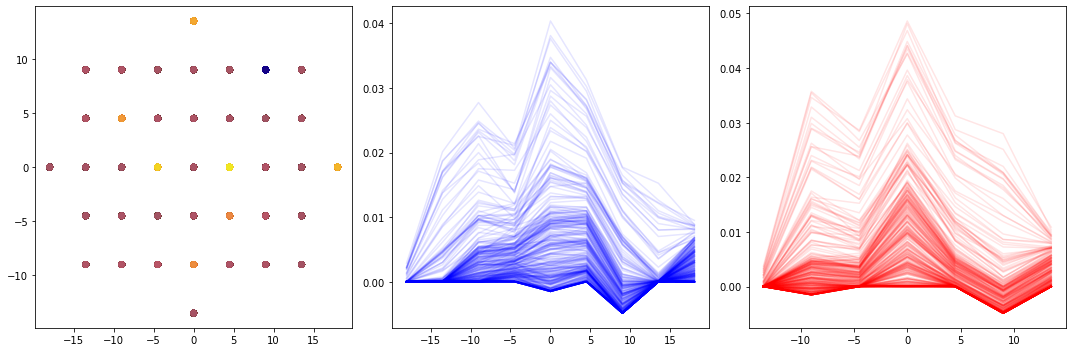

In [275]:
fig, ax = plt.subplots(1,3, tight_layout=True, figsize=(15,5))
for i in range(len(df_bpm)):
    d = {'x': df_bpm.x[i]["elements"], 'y': df_bpm.y[i]["elements"], 'intensity': df_bpm.intensity[i]["elements"] - df_bpm_background.intensity[0]["elements"]}
    df = pd.DataFrame(data=d)
    df.intensity[23]=0

    
    ax[0].scatter(df.x, df.y, c=df.intensity, cmap="plasma", alpha=0.1)

    h_proj = []
    for x in np.sort(df.x.unique()):
        h_proj.append(df[df.x == x].intensity.sum())


    ax[1].plot(np.sort(df.x.unique()), h_proj, color="b", alpha=0.1)

    v_proj = []
    for y in np.sort(df.y.unique()):
        v_proj.append(df[df.y == y].intensity.sum())

    ax[2].plot(np.sort(df.y.unique()), v_proj, color="r", alpha=0.1)

# Nominal beam

In [239]:
# build the query and load data into spark dataframe UTC Time from MD
start = "2022-10-19 10:00:00.000"
end = "2022-10-19 11:00:00.000"
df_bpm = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("IRRAD_BPM1/Acquisition").build().toPandas()
df_bpm_background = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("IRRAD_BPM1_Background/Acquisition").build().toPandas()

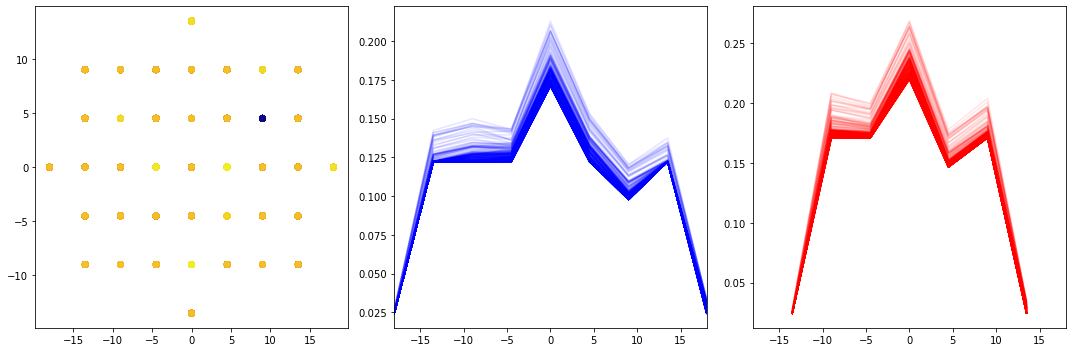

In [289]:
fig, ax = plt.subplots(1,3, tight_layout=True, figsize=(15,5))
for i in range(len(df_bpm)):
    d = {'x': df_bpm.x[i]["elements"], 'y': df_bpm.y[i]["elements"], 'intensity': df_bpm.intensity[i]["elements"]}
    df = pd.DataFrame(data=d)
    df.intensity[23]=0
    
    ax[0].scatter(df.x, df.y, c=df.intensity, cmap="plasma", alpha=0.1)

    h_proj = []
    for x in np.sort(df.x.unique()):
        h_proj.append(df[df.x == x].intensity.sum())

#     try:
#         Hx = np.sort(df.x.unique())
#         Hy = np.array(h_proj)
#         poptH, pcovH = do_gaussian_fit(Hx, Hy)
    
#         Hx_fine = np.linspace(Hx.min(), Hx.max(), 100)
#         ax[1].plot(Hx_fine, gaussian_function(Hx_fine, poptH[0], poptH[1], poptH[2], poptH[3]), label=f"$\sigma$: {abs(round(poptH[3],2))}\n $\sigma_err$ {round(pcovH[3, 3] ** 0.5,3)}", color="darkblue", alpha=0.1)
#     except:
#         pass

    ax[1].plot(np.sort(df.x.unique()), h_proj, color="b", alpha=0.1)
    ax[1].set_xlim(-18,18)
    
    v_proj = []
    for y in np.sort(df.y.unique()):
        v_proj.append(df[df.y == y].intensity.sum())

    ax[2].plot(np.sort(df.y.unique()), v_proj, color="r", alpha=0.1)
    ax[2].set_xlim(-18,18)

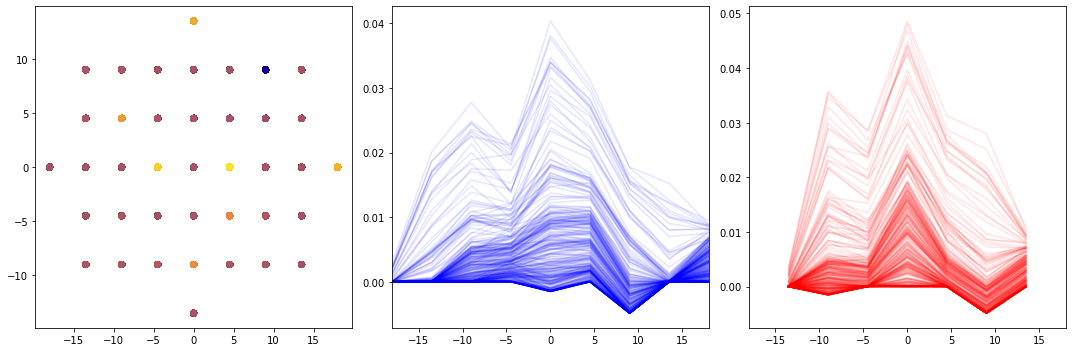

In [288]:
fig, ax = plt.subplots(1,3, tight_layout=True, figsize=(15,5))
for i in range(len(df_bpm)):
    d = {'x': df_bpm.x[i]["elements"], 'y': df_bpm.y[i]["elements"], 'intensity': df_bpm.intensity[i]["elements"] - df_bpm_background.intensity[0]["elements"]}
    df = pd.DataFrame(data=d)
    df.intensity[23]=0
    
    ax[0].scatter(df.x, df.y, c=df.intensity, cmap="plasma", alpha=0.1)

    h_proj = []
    for x in np.sort(df.x.unique()):
        h_proj.append(df[df.x == x].intensity.sum())

#     try:
#         Hx = np.sort(df.x.unique())
#         Hy = np.array(h_proj)
#         poptH, pcovH = do_gaussian_fit(Hx, Hy)
    
#         Hx_fine = np.linspace(Hx.min(), Hx.max(), 100)
#         ax[1].plot(Hx_fine, gaussian_function(Hx_fine, poptH[0], poptH[1], poptH[2], poptH[3]), label=f"$\sigma$: {abs(round(poptH[3],2))}\n $\sigma_err$ {round(pcovH[3, 3] ** 0.5,3)}", color="darkblue", alpha=0.1)
#     except:
#         pass

    ax[1].plot(np.sort(df.x.unique()), h_proj, color="b", alpha=0.1)
    ax[1].set_xlim(-18,18)
    
    v_proj = []
    for y in np.sort(df.y.unique()):
        v_proj.append(df[df.y == y].intensity.sum())

    ax[2].plot(np.sort(df.y.unique()), v_proj, color="r", alpha=0.1)
    ax[2].set_xlim(-18,18)

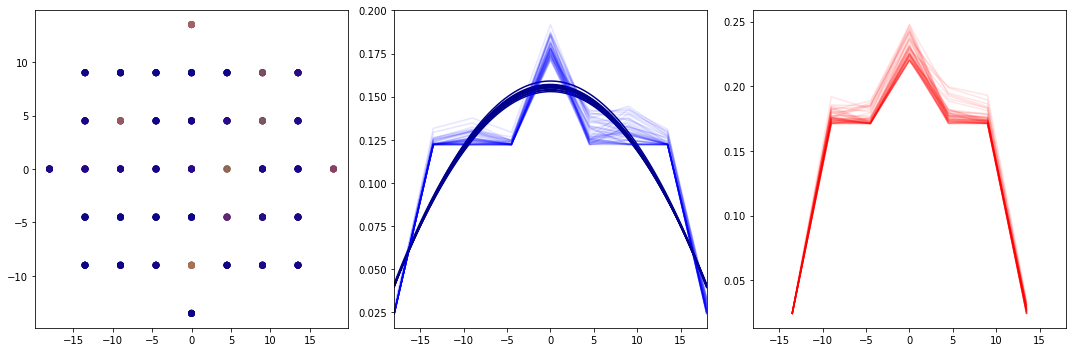

In [285]:
fig, ax = plt.subplots(1,3, tight_layout=True, figsize=(15,5))
for i in range(len(df_bpm_background)):
    d = {'x': df_bpm_background.x[i]["elements"], 'y': df_bpm_background.y[i]["elements"], 'intensity': df_bpm_background.intensity[i]["elements"]}
    df = pd.DataFrame(data=d)

    
    ax[0].scatter(df.x, df.y, c=df.intensity, cmap="plasma", alpha=0.1)

    h_proj = []
    for x in np.sort(df.x.unique()):
        h_proj.append(df[df.x == x].intensity.sum())
        


    ax[1].plot(np.sort(df.x.unique()), h_proj, color="b", alpha=0.1)
    ax[1].set_xlim(-18,18)
    
    v_proj = []
    for y in np.sort(df.y.unique()):
        v_proj.append(df[df.y == y].intensity.sum())

    ax[2].plot(np.sort(df.y.unique()), v_proj, color="r", alpha=0.1)
    ax[2].set_xlim(-18,18)

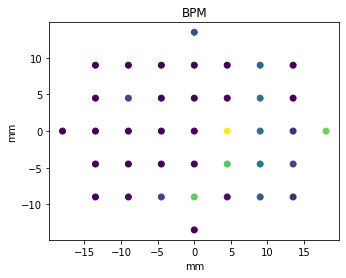

In [215]:
fig, ax = plt.subplots()

i = 6

x = df_bpm_background.x[i]["elements"]
y = df_bpm_background.y[i]["elements"]
z = df_bpm_background.intensity[i]["elements"]

ax.scatter(x,y, c=z/z.max())
ax.set_title("BPM")
ax.set_xlabel("mm")
ax.set_ylabel("mm")
ax.set_aspect("equal")

In [265]:
h_proj = []
for x in np.sort(df.x.unique()):
    h_proj.append(df[df.x == x].intensity.sum())

Hx = np.sort(df.x.unique())
Hy = np.array(h_proj)
poptH, pcovH = do_gaussian_fit(Hx, Hy)
    
fig, ax = plt.subplots()
ax.plot(Hx, Hy, color="b")

Hx_fine = np.linspace(Hx.min(), Hx.max(), 100)
ax.plot(Hx_fine, gaussian_function(Hx_fine, poptH[0], poptH[1], poptH[2], poptH[3]), label=f"$\sigma$: {abs(round(poptH[3],2))}\n $\sigma_err$ {round(pcovH[3, 3] ** 0.5,3)}", color="darkblue")

ax.legend()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

In [267]:
# from datetime import datetime
  
# for i in range(len(df_bpm.acqStamp.unique())):
#     timestamp = np.sort(df_bpm.acqStamp.unique())[i]/1000000000
#     dt_obj = datetime.fromtimestamp(timestamp).strftime('%d-%m-%y-%Hh%Mm%Ss')
  
#     print("date:",dt_obj)

In [266]:
# from datetime import datetime
  
# for i in range(len(df_bpm_background.acqStamp.unique())):
#     timestamp = np.sort(df_bpm_background.acqStamp.unique())[i]/1000000000
#     dt_obj = datetime.fromtimestamp(timestamp).strftime('%d-%m-%y-%Hh%Mm%Ss')
  
#     print("date:",dt_obj)